In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [158]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))

In [159]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

In [160]:
def cost(theta,X,Y,lamda=0):
    m=Y.shape[0]
    return (-(1.0/m) * np.sum((Y*np.log(hyp(theta,X))) + ((1-Y)*np.log(1-hyp(theta,X))))) + ((lamda / (2.0*m))*np.sum(theta[1:]**2))

In [161]:
def grad(theta,X,Y,lamda=0):
    m=Y.shape[0]
    reg=np.vstack((np.zeros((1,1)),(lamda/m) * theta[1:]))
    return ((1.0/m)*np.dot(X.T,(hyp(theta,X)-Y))) + reg

In [162]:
def update(X,Y,theta,num_iter,alpha=0.01,lamda=0,debug=False,div=1000):
    costhist=[]
    for i in range(num_iter):
        
        theta = theta - (alpha * grad(theta,X,Y,lamda))
        c=cost(theta,X,Y)
        costhist.append(c)
        if debug and i%div==0:
            print("Cost after " ,i," is ",c)
            
    return theta,costhist

In [163]:
def accracy(X,y,theta):
    p=1*(hyp(theta,X)>0.5)
    print(p.shape,y.shape)
    return np.sum(p==y)/float(y.shape[0])*100.0

In [164]:
def plot(x,y):
    xpos=x[(y==1)[:,0]]
    xneg=x[(y==0)[:,0]]

    plt.plot(xpos[:,0],xpos[:,1],'g*')
    plt.plot(xneg[:,0],xneg[:,1],'b.')
    plt.show()

In [165]:
def load_plot(f):
    data=np.genfromtxt(f,delimiter=',')
    x,y=data[:,:-1],data[:,-1].reshape(-1,1)
    plot(x,y)
    return x,y,data

In [166]:
def mapFeature(x):
    poly = PolynomialFeatures(6,include_bias=True)
    v=poly.fit_transform(x)
    return v,poly

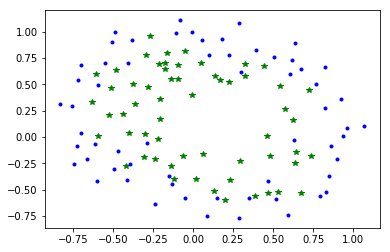

In [167]:
X_o,Y,data=load_plot('../machine-learning-ex2/ex2/ex2data2.txt')
X,poly=mapFeature(X_o)

In [168]:
theta=np.zeros((X.shape[1],1))
print('Initial Cost with lamda=1 : ',cost(theta,X,Y,1))
print('grad : ',grad(theta,X,Y,lamda=1)[:5])

Initial Cost with lamda=1 :  0.6931471805599454
grad :  [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [169]:
theta=np.ones((X.shape[1],1))
print('Initial Cost with lamda=10 : ',cost(theta,X,Y,10))
print('grad : ',grad(theta,X,Y,lamda=10)[:5])

Initial Cost with lamda=10 :  3.1645093316150095
grad :  [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


Cost after  0  is  0.681237315087989
(118, 1) (118, 1)
 Final Cost by gradeint descent :  0.3644235416768502 Accuracy :  83.05084745762711


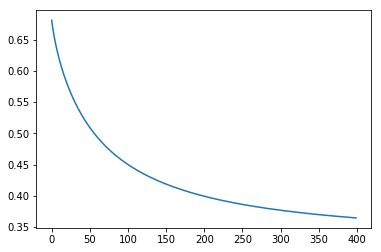

In [170]:
trained_theta=np.zeros((X.shape[1],1))
trained_theta,cost_hist=update(X,Y,trained_theta,400,alpha=1,lamda=0,debug=True)
print(' Final Cost by gradeint descent : ',cost(trained_theta,X,Y),'Accuracy : ',accracy(X,Y,trained_theta))
plt.plot(cost_hist)
plt.show()

In [183]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

(118, 1) (118, 1)
(118, 1) (118, 1)
(118, 1) (118, 1)


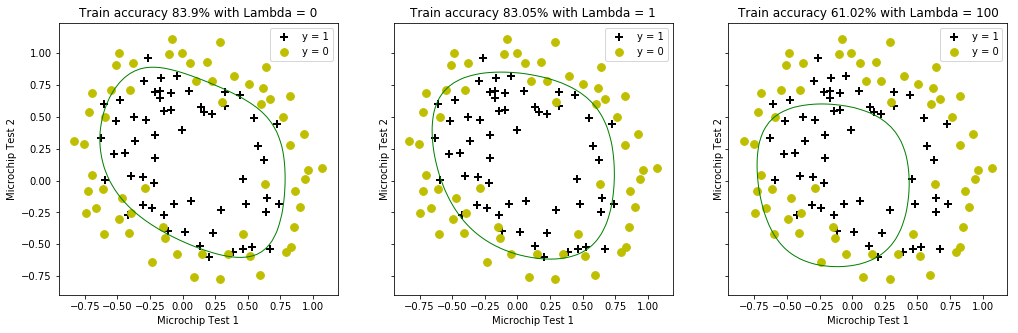

In [187]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    trained_theta=np.zeros((X.shape[1],1))
    trained_theta,cost_hist=update(X,Y,trained_theta,4000,alpha=1,lamda=C,debug=False)
  
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
   
    x1_min, x1_max = X_o[:,0].min(), X_o[:,0].max(),
    x2_min, x2_max = X_o[:,1].min(), X_o[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(trained_theta))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accracy(X,Y,trained_theta), decimals=2), C))